In [5]:
#
import mysql.connector
#
from mysql.connector import Error
#
try:
 connection = mysql.connector.connect(host='127.0.0.1',
 database='3pl_tms',
user='root',
password='123456789',
auth_plugin = 'mysql_native_password')
 if connection.is_connected():
  db_Info = connection.get_server_info()
  print("Connected to MySQL Server version ", db_Info)
  cursor = connection.cursor()
  cursor.execute("select database();")
  record = cursor.fetchone()
  print("Your connected to database: ", record)
#
except Error as e:
 print("Error while connecting to MySQL", e)
#you should see the following output
#'''Connected to MySQL Server version 8.0.17
#Your connected to database: ('classicmodels',)
#True
#MySQL connection is closed'''
#

Connected to MySQL Server version  8.0.31
Your connected to database:  ('3pl_tms',)


In [6]:
import pandas as pd

In [7]:
df = pd.read_sql_query("SELECT * FROM customer", connection)
df

C:\Users\sarav\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,customer_id,customer_name,address,poc
0,1,"Macejkovic, Goodwin and Mayer","2947 Rice Path\nDickinsonfort, AZ 75231",Damaris Waters
1,100,Parisian PLC,"986 Maida Flats\nWest Camrynport, NJ 47897",Vernon Keeling I
2,103,Pfannerstill-Hermann,"005 Emmalee Dale Suite 681\nSouth Cloyd, CO 81...",Beatrice Altenwerth
3,114,Bartell-Wisoky,"89433 Cormier Overpass\nSouth Lavada, VT 40757...",Mrs. Juliana Kirlin
4,120,Graham PLC,"9872 Kevon Mountains\nEast Shaynefort, CA 82358",Eva O'Reilly
...,...,...,...,...
94,97,"Schuppe, Rath and Heidenreich","404 Mertie Isle\nJerodton, IA 94279-5149",Dr. Uriah Pfannersti
95,970,"Medhurst, Farrell and Ebert","95099 Maia Harbors Suite 778\nBeahanville, WV ...",June Tromp
96,980,"Stokes, Leuschke and Gerhold","4865 Langworth Walks Apt. 269\nPalmamouth, MS ...",Parker Bednar
97,985,Simonis-Armstrong,"60120 Kovacek Extension\nLake Chazport, IL 29252",Prof. Carlotta VonRu


In [15]:
df2 = pd.read_sql_query("SELECT vendor.vendor_id, count(vehicle.vehicle_id) as Number_of_Vehicles, SUM(vehicle.capacity) as Total_Capacity FROM vendor INNER JOIN vehicle ON vendor.vendor_id = vehicle.vendor_id GROUP BY vendor.vendor_id", connection)
df2.head()

,vendor_id,Number_of_Vehicles,Total_Capacity
0,310,1,15.0
1,410,1,10.0
2,200,1,13.0
3,500,1,12.0
4,539,1,5.0


In [16]:
contracts_per_customer = pd.read_sql_query("SELECT customer_id, COUNT(*) as contracts FROM contract GROUP BY customer_id", connection)
contracts_per_customer

C:\Users\sarav\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,customer_id,contracts
0,100,3
1,103,3
2,114,3
3,120,3
4,136,3
...,...,...
93,97,2
94,970,2
95,980,2
96,985,2


In [18]:
import matplotlib.pyplot as plt
df5 = pd.read_sql_query("SELECT capacity FROM vehicle", connection)
df5.head()


C:\Users\sarav\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,capacity
0,15
1,10
2,13
3,12
4,5


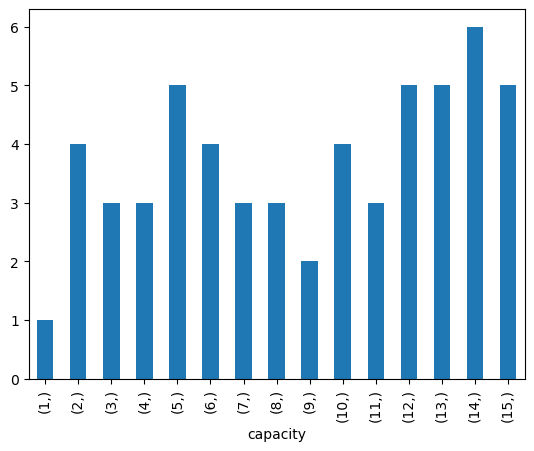

In [19]:
## count of vehicles per capacity
df5.value_counts(sort = False).plot.bar()
plt.show()

In [20]:
df = pd.read_sql_query("SELECT line_of_business, count(*) as count FROM contract GROUP BY line_of_business", connection)
df


C:\Users\sarav\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,line_of_business,count
0,TRAN,91
1,WARE,80
2,SOUR,65


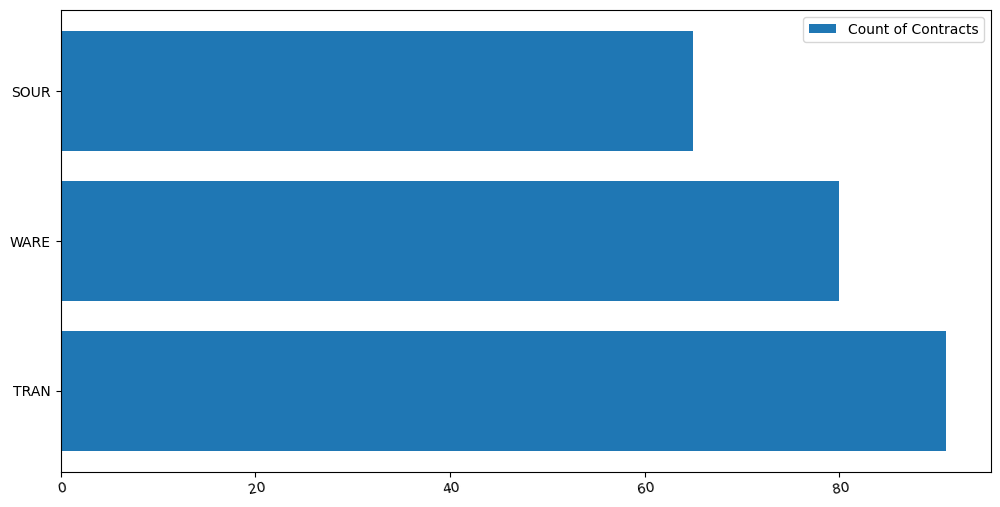

In [24]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.barh(df['line_of_business'], df['count'], label = 'Count of Contracts')
ax.legend()
plt.xticks(rotation = 10, wrap = True)
plt.show()